# Missing Data with Iris Dataset

Some measurements are deleted from the dataset.
- Generally, sepal length and sepal width observations are deleted together for row items.
- Petal length observations are deleted randomly.
- Petal width observations are deleted for only class Iris Virginica.

In [4]:
# pip install missingno

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix ,matthews_corrcoef
from sklearn.linear_model import LogisticRegression

In [6]:
iris_mis=pd.read_csv("iris_mis.txt", header = None, names=["sepal_length", "sepal_width","petal_length","petal_width", "cls"])
iris_mis.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,NaN,NaN,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,NaN,1.8,Iris-virginica


In real life, you probably need to deal with low-quality data, and your dataset probably has missing values. 

To fit machine learning models to your data set should be complete. 

In this case, you may want to remove these missing values from your data set, or you may want to use some imputation techniques to fill the NA values. 

To make a logical choice, you should first understand how NA values are distributed in the data set. 

1. MissingNo

Missingno package provides a nice visual summary of missing data distribution.  
**Bar Chart:** Bar chart shows the # of the nonmissing values in each attribute of the dataset.

<AxesSubplot: >

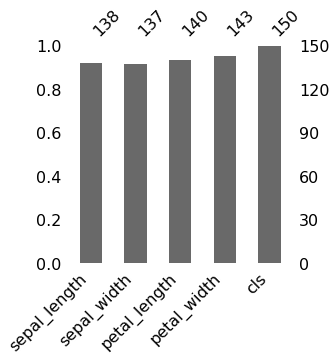

In [7]:
msno.bar(iris_mis, figsize=(4,4))

In [8]:
for columns in iris_mis:
    print(columns, "--> # of missing value", iris_mis[columns].isna().sum())

sepal_length --> # of missing value 12
sepal_width --> # of missing value 13
petal_length --> # of missing value 10
petal_width --> # of missing value 7
cls --> # of missing value 0


**Matrix:** The pattern of the missingness in the data set can be examined by using Matrix. 

As stated before, while creating the iris_mis data set, sepal length and sepal width observations are deleted together for row items generally. By using matrix visualization techniques, you can easily observe this pattern.  

Note: The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

<AxesSubplot: >

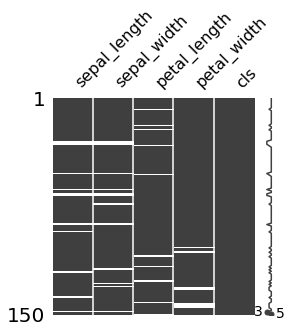

In [9]:
msno.matrix(iris_mis, figsize=(4,4))

**Heatmap :** Heatmap shows the correlation of missingness between every 2 columns.

A value near -1 means if one variable appears then the other variable is very likely to be missing.  
A value near 0 means there is no dependence between the occurrence of missing values of two variables.  
A value near 1 means if one variable appears then the other variable is very likely to be present.  

However please notice that 
- if there isn't any missing in an attribute/column, this attribute/column isn't shown in the heatmap.
- The petal width observations are deleted for only class Iris Virginica but the heat map cannot identify this pattern.

Please see the correlation between sepal length and sepal width missingness.

<AxesSubplot: >

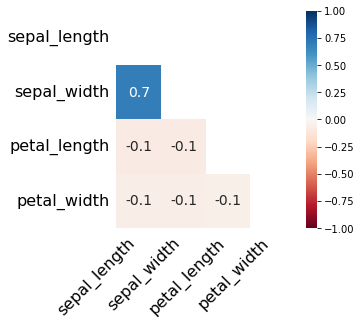

In [10]:
msno.heatmap(iris_mis, figsize=(4,4))

<AxesSubplot: >

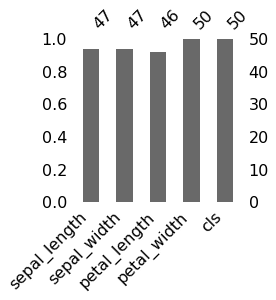

In [11]:
msno.bar(iris_mis[iris_mis["cls"]=="Iris-setosa"], figsize=(3,3))

<AxesSubplot: >

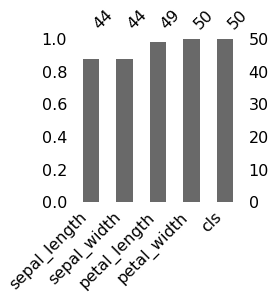

In [12]:
msno.bar(iris_mis[iris_mis["cls"]=="Iris-versicolor"], figsize=(3,3))

<AxesSubplot: >

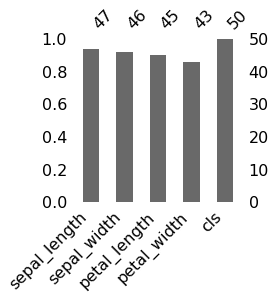

In [13]:
msno.bar(iris_mis[iris_mis["cls"]=="Iris-virginica"], figsize=(3,3))

2. Handling NA values

In [14]:
target, uniques = pd.factorize(iris_mis["cls"])
iris_mis["cls"]=target
iris_mis.head()

,sepal_length,sepal_width,petal_length,petal_width,cls
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


3. Drop NA values

In [15]:
iris_mis1 = iris_mis.copy()
iris_mis1 = iris_mis1.dropna()
iris_mis1.describe()

,sepal_length,sepal_width,petal_length,petal_width,cls
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,5.765812,3.052137,3.574359,1.117949,0.905983
std,0.803995,0.427018,1.741093,0.746903,0.798521
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.100000,2.800000,1.500000,0.300000,0.000000
50%,5.700000,3.000000,4.100000,1.300000,1.000000
75%,6.300000,3.300000,5.000000,1.700000,2.000000
max,7.700000,4.400000,6.700000,2.500000,2.000000


4. Imputation

4.1. Median Imputation

In [16]:
iris_mis2 = iris_mis.copy()
median = iris_mis2.median()
median

sepal_length    5.75
sepal_width     3.00
petal_length    4.35
petal_width     1.30
cls             1.00
dtype: float64

In [17]:
iris_mis2.fillna(median, inplace=True)
iris_mis2.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.70,3.0,5.20,2.3,2
146,6.30,2.5,5.00,1.9,2
147,5.75,3.0,5.20,2.0,2
148,6.20,3.4,5.40,2.3,2
149,5.90,3.0,4.35,1.8,2


In [18]:
iris_mis.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,NaN,NaN,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,NaN,1.8,2


Please be aware that Imputer cannot handle string values and gives an error like this "ValueError: could not convert string to float: 'Iris-setosa'". 

Therefore, cls attribute can be converted as numbers by using the pd.factorize method.  

Note: Imputer returns a numpy array.

In [19]:
iris_mis3 = iris_mis.copy()
iris_mis3.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,NaN,NaN,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,NaN,1.8,2


In [20]:
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
imp_med.fit(iris_mis3)
iris_mis3 = imp_med.transform(iris_mis3)
iris_mis3= pd.DataFrame(iris_mis3, columns=["sepal_length", "sepal_width", "petal_length", "petal_width","cls"])
iris_mis3.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.70,3.0,5.20,2.3,2.0
146,6.30,2.5,5.00,1.9,2.0
147,5.75,3.0,5.20,2.0,2.0
148,6.20,3.4,5.40,2.3,2.0
149,5.90,3.0,4.35,1.8,2.0


4.2. Mean Imputation

In [21]:
iris_mis4 = iris_mis.copy()
mean = iris_mis4.mean()
mean

sepal_length    5.831884
sepal_width     3.062044
petal_length    3.770714
petal_width     1.156643
cls             1.000000
dtype: float64

In [22]:
iris_mis.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,NaN,NaN,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,NaN,1.8,2


In [23]:
iris_mis4.fillna(mean, inplace=True)
iris_mis4.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.700000,3.000000,5.200000,2.3,2
146,6.300000,2.500000,5.000000,1.9,2
147,5.831884,3.062044,5.200000,2.0,2
148,6.200000,3.400000,5.400000,2.3,2
149,5.900000,3.000000,3.770714,1.8,2


In [24]:
iris_mis5 = iris_mis.copy()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(iris_mis5)
iris_mis5 = imp_mean.transform(iris_mis5)
iris_mis5= pd.DataFrame(iris_mis5, columns=["sepal_length", "sepal_width", "petal_length", "petal_width","cls"])
iris_mis5.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.700000,3.000000,5.200000,2.3,2.0
146,6.300000,2.500000,5.000000,1.9,2.0
147,5.831884,3.062044,5.200000,2.0,2.0
148,6.200000,3.400000,5.400000,2.3,2.0
149,5.900000,3.000000,3.770714,1.8,2.0


4.3. MICE Imputation

Please see https://www.statsmodels.org/stable/generated/statsmodels.imputation.mice.MICE.html

In [25]:
import statsmodels.imputation.mice as mice
import statsmodels.api as sm

mice_data=pd.read_csv("mice_missing.csv")
mice_data.head()

,c1,c2,c3,c4,target
0,8.34,NaN,1010.84,90.01,480.48
1,23.64,NaN,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [26]:
for columns in mice_data:
    print(columns, "--> # of missing value", mice_data[columns].isna().sum(), ",   missingness_ratio:%.2f" % (mice_data[columns].isna().sum()/len(mice_data)))

c1 --> # of missing value 669 ,   missingness_ratio:0.07
c2 --> # of missing value 1052 ,   missingness_ratio:0.11
c3 --> # of missing value 478 ,   missingness_ratio:0.05
c4 --> # of missing value 1243 ,   missingness_ratio:0.13
target --> # of missing value 0 ,   missingness_ratio:0.00


In [27]:
np.random.seed(5)
imp1 = mice.MICEData(mice_data)
fml1 = 'target ~ c1 + c2 + c3 + c4'
mice1 = mice.MICE(fml1, sm.OLS, imp1)
results1 = mice1.fit(0,3)
print(results1.summary())

                            Results: MICE
Method:                     MICE         Sample size:           9568 
Model:                      OLS          Scale                  20.99
Dependent variable:         target       Num. imputations       3    
---------------------------------------------------------------------
           Coef.   Std.Err.     t     P>|t|   [0.025   0.975]   FMI  
---------------------------------------------------------------------
Intercept 457.6630  10.5211   43.4997 0.0000 437.0421 478.2839 0.1332
c1         -1.9845   0.0162 -122.7207 0.0000  -2.0162  -1.9528 0.1008
c2         -0.2299   0.0074  -31.2542 0.0000  -0.2443  -0.2155 0.0080
c3          0.0591   0.0102    5.8170 0.0000   0.0392   0.0791 0.1265
c4         -0.1601   0.0044  -36.5155 0.0000  -0.1687  -0.1515 0.0936



In [28]:
d=np.zeros(mice_data.shape)
dumb=pd.DataFrame(d, columns=["c1", "c2","c3","c4", "target"])
for i in range(3):
    print(imp1.next_sample().head())
    dumb=dumb+imp1.data
#     print(imp1.data.head())
    print("---------")    
fill_mice_data=dumb/3
fill_mice_data.head()

      c1     c2       c3     c4  target
0   8.34  40.72  1010.84  90.01  480.48
1  23.64  63.94  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
---------
      c1     c2       c3     c4  target
0   8.34  40.60  1010.84  90.01  480.48
1  23.64  68.31  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
---------
      c1     c2       c3     c4  target
0   8.34  37.14  1010.84  90.01  480.48
1  23.64  59.43  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
---------


,c1,c2,c3,c4,target
0,8.34,39.486667,1010.84,90.01,480.48
1,23.64,63.893333,1011.40,74.20,445.75
2,29.74,56.900000,1007.15,41.91,438.76
3,19.07,49.690000,1007.22,76.79,453.09
4,11.80,40.660000,1017.13,97.20,464.43


In [29]:
mis_data=pd.read_csv("mis_data.csv")
mis_data.head()

,x1,x2,x3,x4
0,male,NaN,3.0,42.0
1,female,25.2,1.4,35.8
2,male,30.4,7.4,25.3
3,male,33.9,3.0,29.2
4,female,36.3,8.0,33.1


In [30]:
def create_missingness_map(mis_data):
    columns=mis_data.columns
    mis_map=pd.DataFrame(data=np.zeros(mis_data.shape), columns=mis_data.columns, dtype=int)
    for col in columns:
        col_mis_index=mis_data[mis_data[col].isnull()].index
        mis_map.loc[col_mis_index,col]=1    
    return mis_map

In [31]:
mis_map=create_missingness_map(mis_data)
mis_map.head(10)

,x1,x2,x3,x4
0,0,1,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,1,0,0
7,0,0,0,0
8,1,0,0,0
9,0,0,0,0


In [32]:
tab = pd.crosstab(mis_data["x1"], mis_map["x2"])
tab

x2,0,1
x1,,
female,173,17
male,270,30


$H_{0}$: Missingness of x2 is independent of x1.  
$H_{1}$: Missingness of x2 is  not independent of x1.  

In [33]:
chi2, p, dof, ex =stats.chi2_contingency(tab)
print("p value:%.4f" % p)
if p <0.05:    
    print("Reject null hypothesis >> Missingness of x2 is not independent of x1")
else:
    print("Fail to reject null hypothesis >> Missingness of x2 is independent of x1")

p value:0.8196
Fail to reject null hypothesis >> Missingness of x2 is independent of x1


**Recall that the petal width observations are deleted for only class Iris Virginica**

In [34]:
iris_mis_map=create_missingness_map(iris_mis)
iris_tab = pd.crosstab(iris_mis["cls"], iris_mis_map["petal_width"])
chi2, p, dof, ex =stats.chi2_contingency(iris_tab)
print("p value:%.4f" % p)
if p <0.05:
    print("Reject null hypothesis ")
else:
    print("Fail to reject null hypothesis")

p value:0.0006
Reject null hypothesis 


In [35]:
iris_mis.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,NaN,NaN,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,NaN,1.8,2


In [36]:
iris_mis_map.tail()

,sepal_length,sepal_width,petal_length,petal_width,cls
145,0,0,0,0,0
146,0,0,0,0,0
147,1,1,0,0,0
148,0,0,0,0,0
149,0,0,1,0,0


-----------
$H_{0}$: $\mu_{x3|x2 is nan}= \mu_{x3|x2 is complete}$  **or** $\mu_{x3|x2 is nan}- \mu_{x3|x2 is complete} = 0 $     **or** The mean of the samples are same.      
$H_{1}$: $\mu_{x3|x2 is nan} \neq \mu_{x3|x2 is complete}$  **or** $\mu_{x3|x2 is nan}- \mu_{x3|x2 is complete} \neq 0 $      **or** The mean of the samples are different.

In [37]:
x2_mis_index = mis_data[mis_data["x2"].isnull()].index ##x2'nin kayıp olduğu indexler
x2_complete_index = mis_data[mis_data["x2"].notnull()].index ##x2'nin complete olduğu indexler

# #### same with
# x2_mis_index=mis_map[mis_map["x2"]==1].index
# x2_complete_index=mis_map[mis_map["x2"]==0].index
# print(len(x2_mis_index), len(x2_complete_index))

check_numerics=["x3","x4"]
for column in check_numerics:
    print("-------- mean comparison of", column, " while x2 exists and x2 is nan--------")

    stat, pvalue= stats.mannwhitneyu(mis_data.loc[x2_mis_index,column],mis_data.loc[x2_complete_index,column],alternative="two-sided")
    
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> DIFFERENT MEAN")
    else:
        print("Fail to reject null hypothesis >> same mean")

-------- mean comparison of x3  while x2 exists and x2 is nan--------
x3  p value:0.2395
Fail to reject null hypothesis >> same mean
-------- mean comparison of x4  while x2 exists and x2 is nan--------
x4  p value:0.1110
Fail to reject null hypothesis >> same mean


--------------
$H_{0}$: Distribution of x3|x2_is_nan is same with distribution of x3|x2_is_complete.  
$H_{1}$: Distribution of x3|x2_is_nan is different than distribution of x3|x2_is_complete.   

In [38]:
check_numerics=["x3","x4"]
for column in check_numerics:
    print("-------- distribution comparison of", column, " while x2 exists and x2 is nan--------")
 
    stat, pvalue= stats.ks_2samp(mis_data.loc[x2_mis_index,column],mis_data.loc[x2_complete_index,column])
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
    else:
        print("Fail to reject null hypothesis >> The samples come from same distribution.")  

-------- distribution comparison of x3  while x2 exists and x2 is nan--------
x3  p value:0.2121
Fail to reject null hypothesis >> The samples come from same distribution.
-------- distribution comparison of x4  while x2 exists and x2 is nan--------
x4  p value:0.3351
Fail to reject null hypothesis >> The samples come from same distribution.


accuracy= 0.9000
recall= 0.0000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


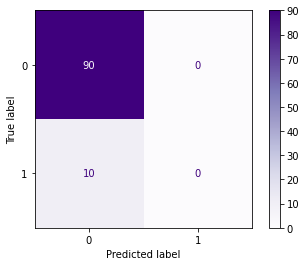

In [39]:
x=mis_data.loc[:,["x3"]]
y=mis_map["x2"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
y_pred_dt = clf.predict(x_test)
print("accuracy= %.4f" % accuracy_score(y_test, y_pred_dt))
print("recall= %.4f" % recall_score(y_test, y_pred_dt))

labels=np.unique(y.values)
plot_confusion_matrix(clf, x_test, y_test, display_labels=labels, values_format='.0f', cmap=plt.cm.Purples)
plt.show()

accuracy= 0.9000
recall= 0.0000
mcc= 0.0000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


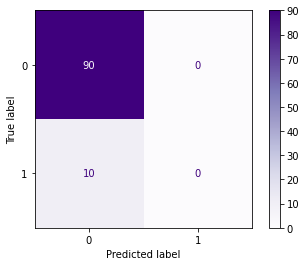

In [40]:
x=mis_data.loc[:,["x4"]]
y=mis_map["x2"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
y_pred_dt = clf.predict(x_test)
print("accuracy= %.4f" % accuracy_score(y_test, y_pred_dt))
print("recall= %.4f" % recall_score(y_test, y_pred_dt))
print("mcc= %.4f" % matthews_corrcoef(y_test, y_pred_dt))
### imbalanced veriler için bakılması uygun metrik, mcc hiç true pozitif olmadığında hata alıyor

labels=np.unique(y.values)
plot_confusion_matrix(clf, x_test, y_test, display_labels=labels, values_format='.0f', cmap=plt.cm.Purples)
plt.show()

- **<font color=#C91414>Please be aware that accuracy may be misleading. The model overfits and predicts always zero. If you check the recall score, you can see that none of the missing values could be predicted.</font>** 

|Actual/Predicted |Negative |Positive|
|:- |:- |:- |
|Negative|TN |FP |
|Positive |FN |TP |

$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $ <br>

$ Precision = \frac{TP}{TP + FP} $ <br>

$ Recall = \frac{TP}{TP + FN} $ <br>